# **STANDARD NOTEBOOK TO GET RESULTS**

## 1. Clean the Data

In [23]:
import pandas as pd 
import process
import numpy as np 
# Jerome path : r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\DataBase.csv'
# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv'
df = pd.read_csv(r'/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.fillna(0) # Utilisez la méthode fillna(0) pour remplacer les NaN par 0

## 2. Run the code

Once the run is completed, you have: 
* the overall return -> overall return
* the PnL associated to the strategy
* the daily PnL associated to the strategy
* the Sharpe Ratio associated to the strategy

In [61]:
import warnings 
warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell

##################################################################### PARAMETERS #####################################################################
lookback_window_0 = [2916, 3016] ## year 2012-2013 ==> 3016:3265
number_of_clusters = 38
sigma = 10e-2
clustering_method = 'SPONGE_sym' 
number_of_repetition = 20
number_of_window=50
evaluation_window = 3
eta = 0.01
######################################################################################################################################################

overall_return, PnL, portfolio_value, daily_PnL = process.sliding_window(df_cleaned=df_cleaned, lookback_window_0=lookback_window_0, number_of_clusters=number_of_clusters, sigma=sigma, clustering_method=clustering_method, number_of_repetition=number_of_repetition, number_of_window=number_of_window, evaluation_window=evaluation_window, eta=eta)

0.9952308562936167
step 1
0.9932532102989401
step 2
0.9926144890237109
step 3
0.999661992841322
step 4
0.9917501726280183
step 5
0.9943298783687329
step 6
0.9908388493214867
step 7
0.9929367544886782
step 8
0.9898408098568788
step 9
0.9710646487901512
step 10
0.956558497530867
step 11
0.9634409991736346
step 12
0.9587542486390727
step 13
0.9646590707956451
step 14
0.9659637044882864
step 15
0.9690836068987696
step 16
0.9685225303119269
step 17
0.974896860539882
step 18
0.9709949468282522
step 19
0.9760293295244693
step 20
0.9762055786521123
step 21
0.9733426074836774
step 22
0.9612422688316797
step 23
0.962376013948546
step 24
0.9697911125282629
step 25
0.9791349803931696
step 26
0.9777965301761614
step 27
0.9826449622835297
step 28
0.9834268853809436
step 29
0.9698476876084926
step 30
0.9578131954480953
step 31
0.9592918550128432
step 32
0.9521004173162615
step 33
0.9530387746437561
step 34
0.9525536273686999
step 35


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
    
KeyboardInterrupt: 


0.9482944452765578
step 36
0.9496763904267977
step 37
0.9460150335546362
step 38
0.9406821203899975
step 39
0.9377884411353338
step 40
0.9327040518714184
step 41
0.9222378783590496
step 42
0.9160395263726041
step 43
0.8957659108724657
step 44
0.9046442359844453
step 45


## 3. Save the results to csv files (APPLY THE CELLS ONLY ONCE AS IT CREATES 3 FILES !!)

In [59]:
year = '2013-24_05_2016'
clustering_method = 'SPONGE_sym'

## process.save_to_csv(year=year, clustering_method=clustering_method)


df_daily = pd.DataFrame(daily_PnL, columns=['Daily PnL'])

df_daily.to_csv(f'daily_{year}_{clustering_method}_{evaluation_window}_{len(lookback_window_0)}.csv', index=False)

df_PnL = pd.DataFrame(PnL, columns=['PnL'])

df_PnL.to_csv(f'PnL_{year}_{clustering_method}_{evaluation_window}_{len(lookback_window_0)}.csv', index=False)

df_overall_return = pd.DataFrame(overall_return.values, columns=['Return'])

df_overall_return.to_csv(f'Overall_return_{year}_{clustering_method}_{evaluation_window}_{len(lookback_window_0)}.csv', index=False)


## 4. Get SP500 data for comparison

In [44]:
start_date = '2014-01-01'
end_date = '2015-01-01'

sp500_PnL = process.get_sp500_PnL(start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


## 5. Plot Portfolio Cumulative PnL vs SP500 Cumulative PnL

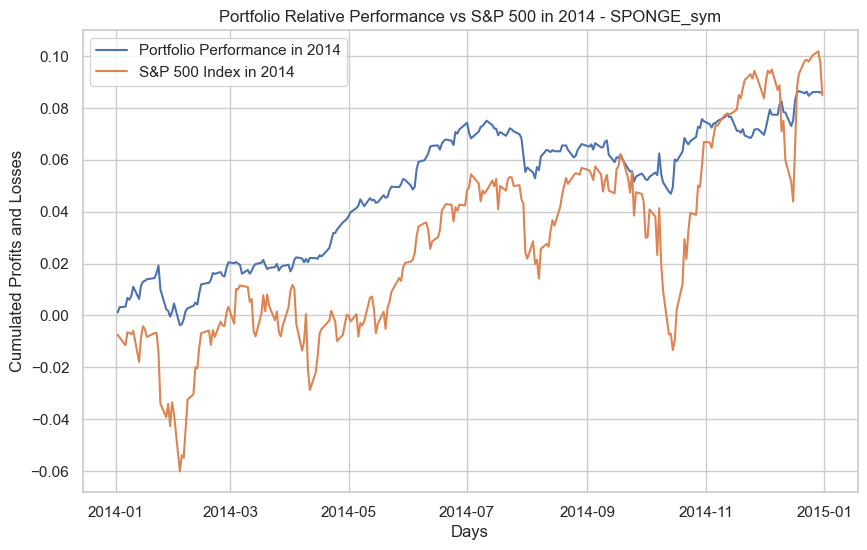

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the cumulative returns
portfolio_cumulative = pd.DataFrame(index = sp500_PnL.index, columns=[f'Portfolio Performance in {year}'], data=PnL)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the relative performance using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=portfolio_cumulative)
sns.lineplot(data=sp500_PnL.cumsum(), label=f'S&P 500 Index in {year}')
plt.xlabel('Days')
plt.ylabel('Cumulated Profits and Losses')
plt.title(f'Portfolio Relative Performance vs S&P 500 in {year} - {clustering_method}')
plt.legend()
plt.show()

# 6. Plot portfolio value alone

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)
days = np.linspace()
# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer la PnL cumulative avec seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(portfolio_value, color='blue')

# Ajouter des titres et des légendes
plt.title(f'Portfolio Value of Time for an Initial Investment of $1 in {year} - {clustering_method}')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')

# Afficher le graphique
plt.show()

TypeError: linspace() missing 2 required positional arguments: 'start' and 'stop'

# 7. Barplot Daily PnL vs SP500

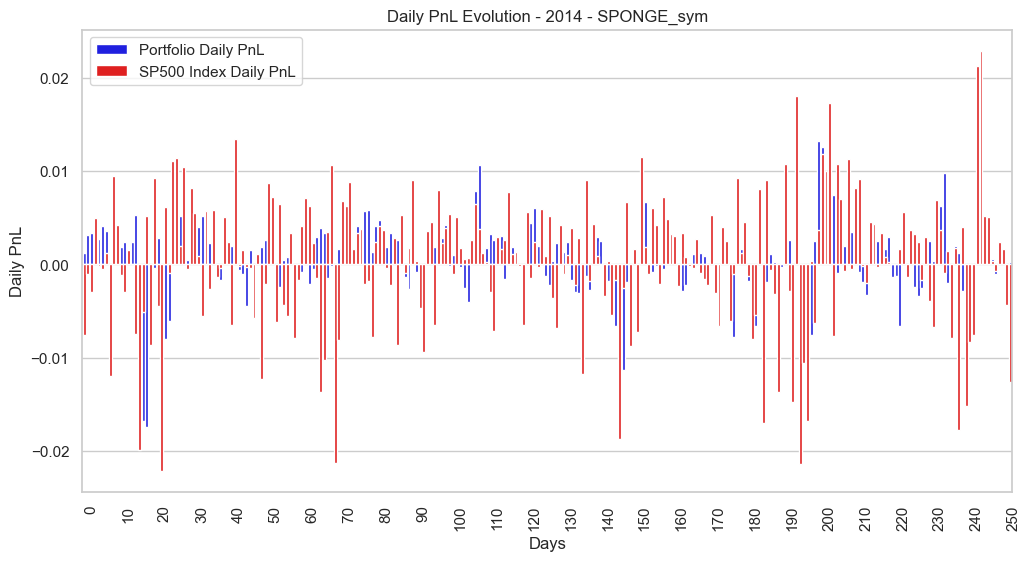

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)
days = np.arange(1, len(daily_PnL) + 1)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer l'évolution quotidienne de la PnL sous forme de diagramme à barres avec seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=days, y=daily_PnL, color='blue', width=0.8, label='Portfolio Daily PnL')  # Ajustez la largeur ici
ax = sns.barplot(x=days, y=sp500_PnL, color='red', width=0.8, label='SP500 Index Daily PnL')

# Rotation des étiquettes de l'axe des abscisses de 45 degrés avec un ajustement
ax.set_xticks(np.arange(0,251,10))
ax.set_xticklabels(ax.get_xticks(), rotation=90, ha='right', rotation_mode='anchor')

# Ajouter des titres et des légendes
plt.title(f'Daily PnL Evolution - {year} - {clustering_method}')
plt.xlabel('Days')
plt.ylabel('Daily PnL')
plt.legend()

# Afficher le graphique
plt.show()

# 8. Plot everything (SPONGE vs Signed Laplacian vs SP500)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Calculate the cumulative returns
portfolio_cumulative_SL = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=['Signed Laplacian Portfolio Performance in 2017'], data=PnL)
portfolio_cumulative_SPONGE = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=['SPONGE Portfolio Performance in 2017'], data=PnL_SPONGE.values)

# Combine dataframes for seaborn plotting
combined_df = pd.concat([portfolio_cumulative_SL, portfolio_cumulative_SPONGE, sp500_PnL.cumsum()], axis=1)
combined_df.columns = ['Signed Laplacian', 'SPONGE', 'S&P 500 Index in 2017']

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the relative performance using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, palette=['blue', 'red', 'green'])
plt.xlabel('Days')
plt.ylabel('Cumulated Profits and Losses')
plt.title('Portfolio Relative Performance vs S&P 500 in 2017')
plt.legend()
plt.show()